# Kymograph Image Grid

This script assumes each of your kymographs are in a separate folder and are named Kymograph.png. Adjust the brightness of ALL images by changing the second parameter in: 

`if "Kymograph" in filename:
    img = adjust_brightness(img, 3)`

Change where it says '3', this means 3x as bright, so alter this as you see fit

Change title of image grid: `plot_images(resized_images, resize_functions, images_dir, title="Your Title") `

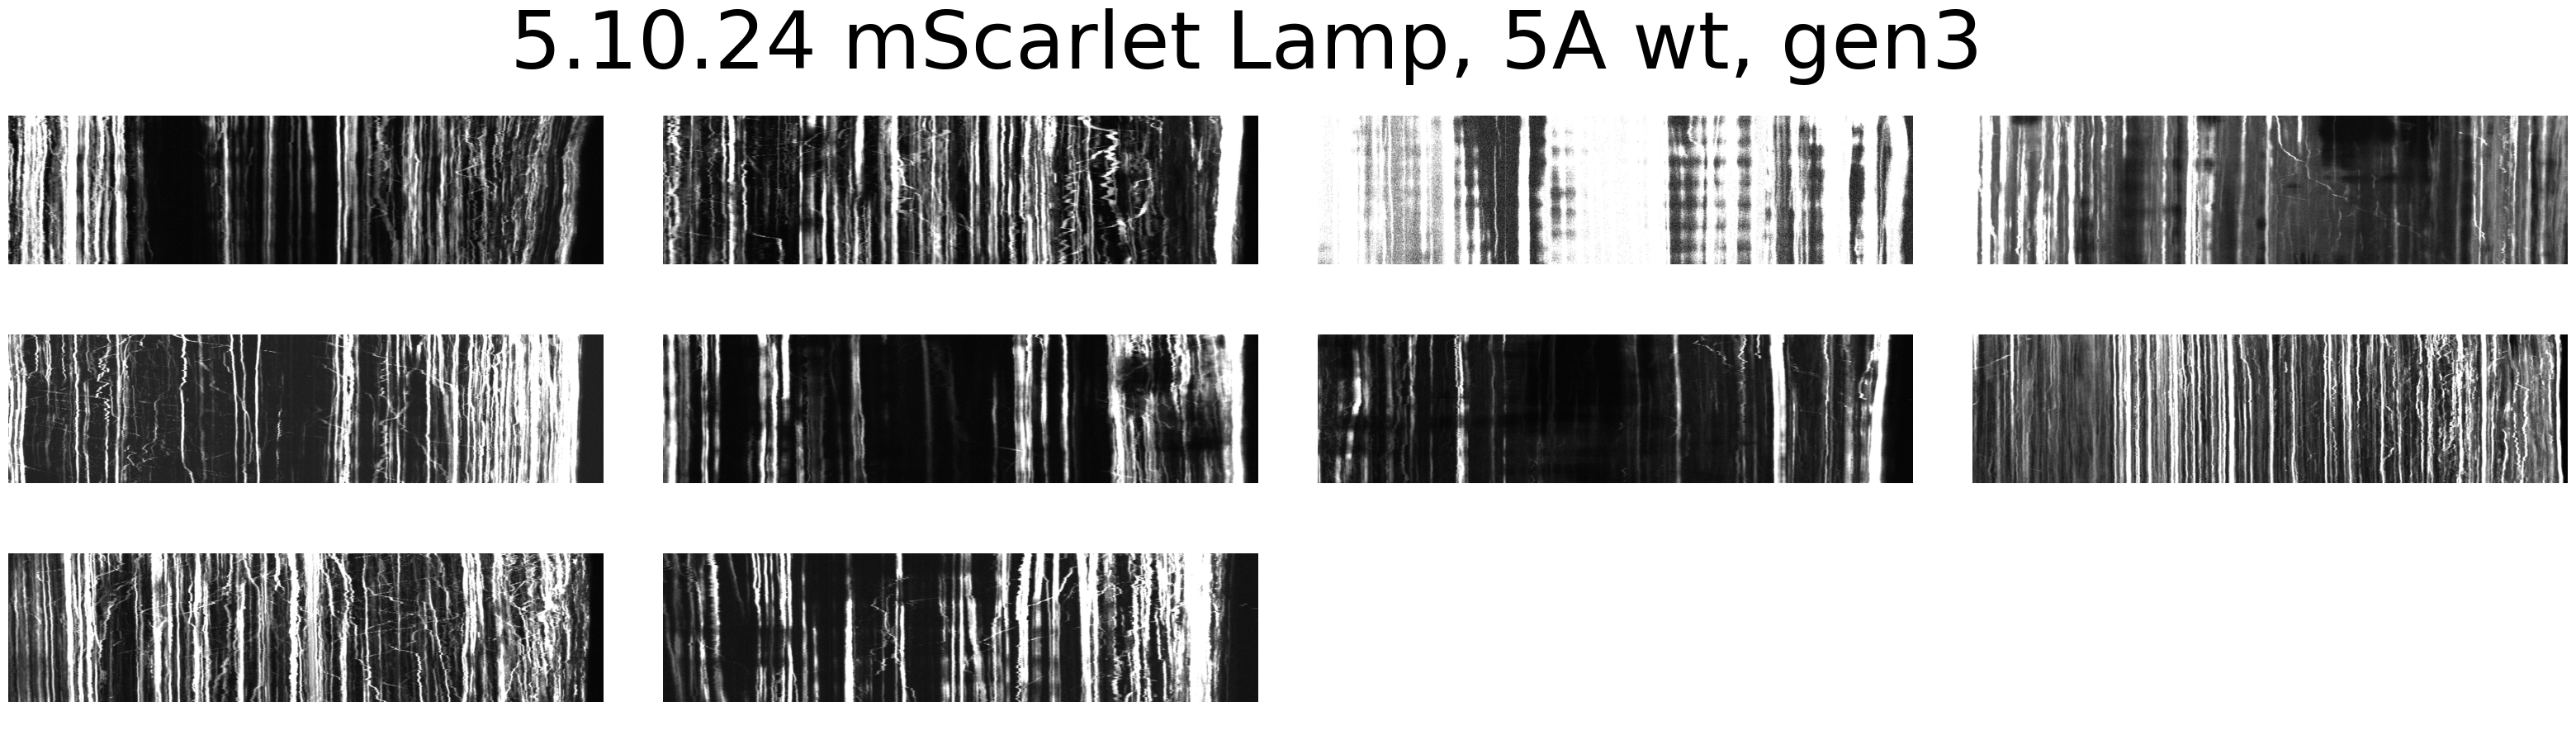

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images to 1024x512
def resize_function_rectangle(image):
    return image.resize((2048, 512), Image.BICUBIC)

# Function to resize images based on their aspect ratio
def resize_images(images_dir):
    resized_images = []
    resize_functions = []  # Keep track of which resize function was used for each image
    for root, dirs, files in os.walk(images_dir):
        for filename in files:
            if filename.endswith("Kymograph.png"):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)

                # Adjust brightness for certain channels
                if "Kymograph" in filename:
                    img = adjust_brightness(img, 5)
                
                resized_img = resize_function_rectangle(img)
                resize_functions.append("rectangle")
                resized_images.append(resized_img)

    return resized_images, resize_functions

# Function to adjust brightness of an image without changing colors
def adjust_brightness(image, brightness_factor):
    # Convert image to grayscale
    grayscale_image = image.convert('L')

    # Adjust brightness by multiplying pixel values by the brightness factor
    adjusted_image = Image.eval(grayscale_image, lambda x: x * brightness_factor)

    # Convert the adjusted grayscale image back to RGB
    return adjusted_image.convert('RGB')



# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, resize_functions, images_dir, num_cols=4, title="Image Grid"):
    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)

    # Calculate figure size based on the number of columns
    fig_width = 40
    fig_height = fig_width / num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            resize_function = resize_functions[i]
            ax.imshow(img)
            ax.axis('off')
            if resize_function == "square":
                ax.set_aspect('auto')  # Set aspect ratio to 'auto' for square images
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots

    fig.suptitle(title, fontsize=70, wrap=True)  # Enable text wrapping for the title
    save_path = os.path.join(images_dir, title + ".png")
    plt.savefig(save_path)


# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images, resize_functions = resize_images(images_dir)
        plot_images(resized_images, resize_functions, images_dir, title="5.10.24 mScarlet Lamp, 5A wt, gen3")  # Pass the title to plot_images

if __name__ == "__main__":
    main()


# Image Grid of Results Graphs

Optional, if you want to visualize all the graphs at once. Choose the results folder from whatever you want to visualize (either one replicate of data or all replicates) and it will output a png file in the same folder (could change this to a different file type if desired). Change the title of the image here: `plot_images(resized_images, resize_functions, images_dir, title="Your title here")`

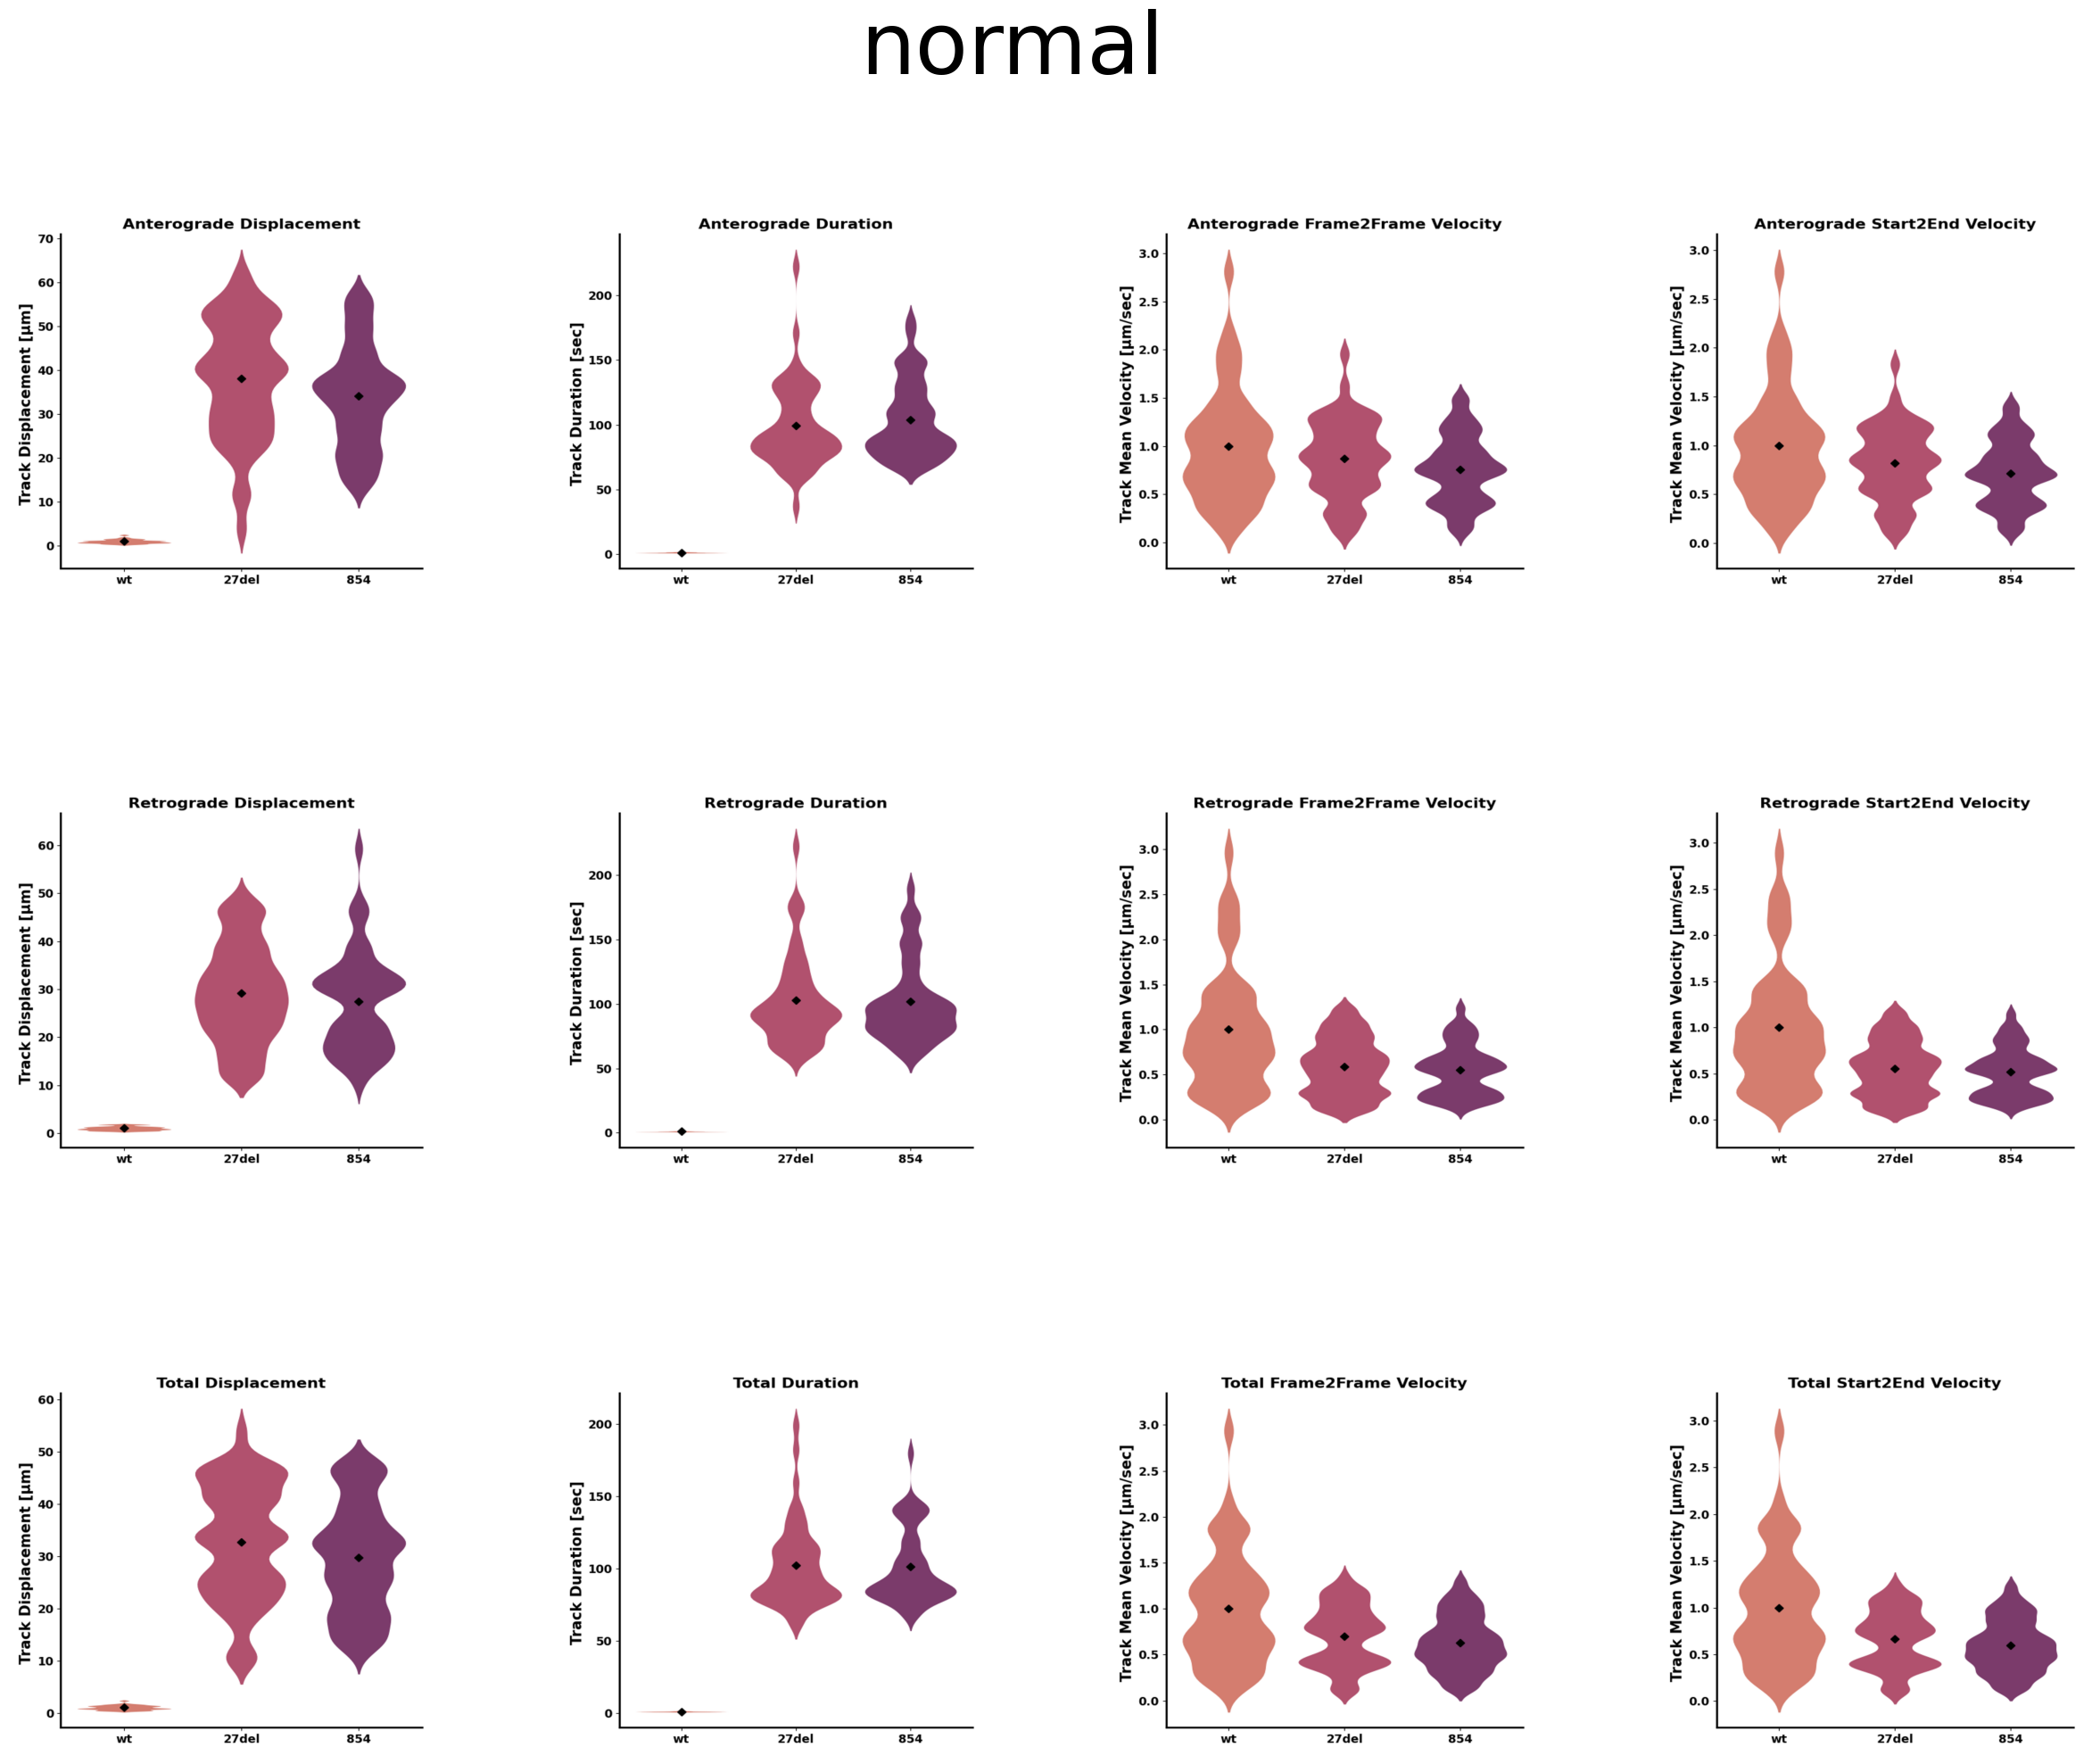

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images to 1024x1024
def resize_function_square(image):
    return image.resize((1024, 1024), Image.BICUBIC)

# Function to resize images to 1024x512
def resize_function_rectangle(image):
    return image.resize((1024, 512), Image.BICUBIC)

# Function to resize images based on their aspect ratio
def resize_images(images_dir):
    resized_images = []
    resize_functions = []  # Keep track of which resize function was used for each image
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)

            #Adjust brightness for certain channels
            if "C1" in filename:
                img = adjust_brightness(img, 10)

            #if "C3" in filename:
                #img = adjust_brightness(img, 25)
            
            if "merge" in filename:
                img = adjust_brightness(img, 6)

            if img.width == img.height:
                resized_img = resize_function_square(img)
                resize_functions.append("square")
            else:
                resized_img = resize_function_rectangle(img)
                resize_functions.append("rectangle")
            resized_images.append(resized_img)
    return resized_images, resize_functions

# Function to adjust brightness of an image
def adjust_brightness(image, brightness_factor):
    # Adjust brightness here, example: increase by 20
    return image.point(lambda p: p * brightness_factor)

# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, resize_functions, images_dir, num_cols=4, title="Image Grid"):

    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 30
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            resize_function = resize_functions[i]
            ax.imshow(img)
            ax.axis('off')
            if resize_function == "square":
                ax.set_aspect('auto')  # Set aspect ratio to 'auto' for square images
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    
    fig.suptitle(title, fontsize=70, wrap=True)  # Enable text wrapping for the title
    save_path = os.path.join(images_dir, title+".png")
    plt.savefig(save_path)


# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images, resize_functions = resize_images(images_dir)
        plot_images(resized_images, resize_functions, images_dir, title="normal")  # Pass the title to plot_images

if __name__ == "__main__":
    main()

